In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def polyd3(x):
    return x**3 - 9 * x
def polyd3_1(x):
    return 3 * x**2 - 9
def polyd3_2(x):
    return  6 * x
c1 = -np.sqrt(3)
c2 = np.sqrt(3)

def linApprox(x_0, derivs=[polyd3, polyd3_1]):
    def la(x):
        f0, f1 = derivs
        return f0(x_0) + (x - x_0) * f1(x_0)
    return la
        
def quadApprox(x_0, derivs=[polyd3, polyd3_1, polyd3_2]):
    def qa(x): 
        f0, f1, f2 = derivs
        return f0(x_0) + (x - x_0) * f1(x_0) + 0.5 * (x - x_0)**2 * f2(x_0)
    return qa

qac1 = quadApprox(4.)
la3 = linApprox(4)


<IPython.core.display.Javascript object>


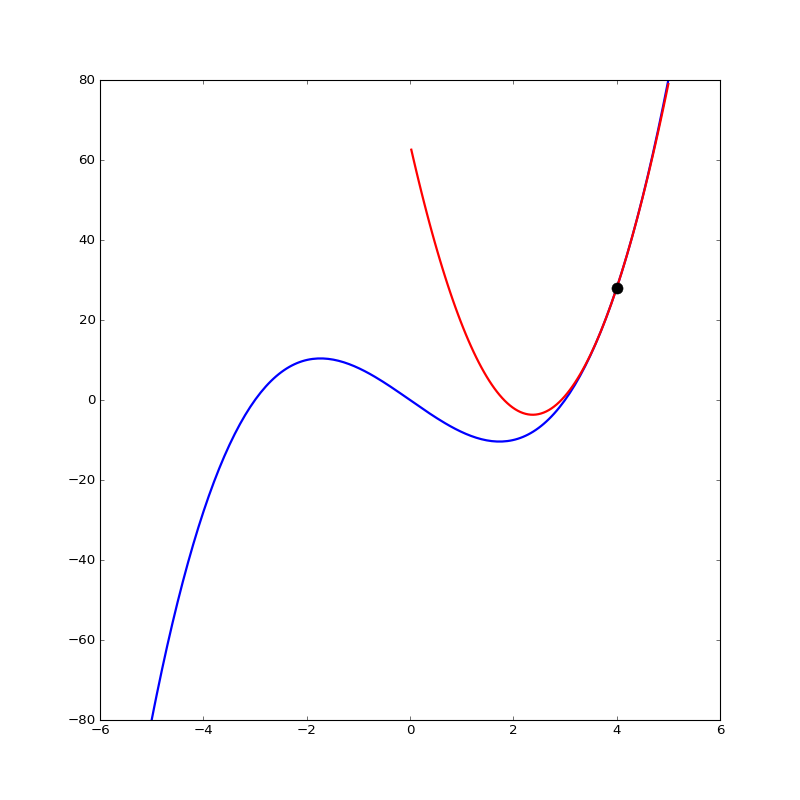

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-5, 5, 200)
y = polyd3(x)
ax.plot(x, y, lw=2, c='b')
#plt.plot(x[140:], la3(x[140:]), lw=2, c='g')
ax.plot(x[100:], qac1(x[100:]), lw=2, c='r')
ax.plot([4], [polyd3(4.)], marker='o', c='k', markersize=10)

<IPython.core.display.Javascript object>


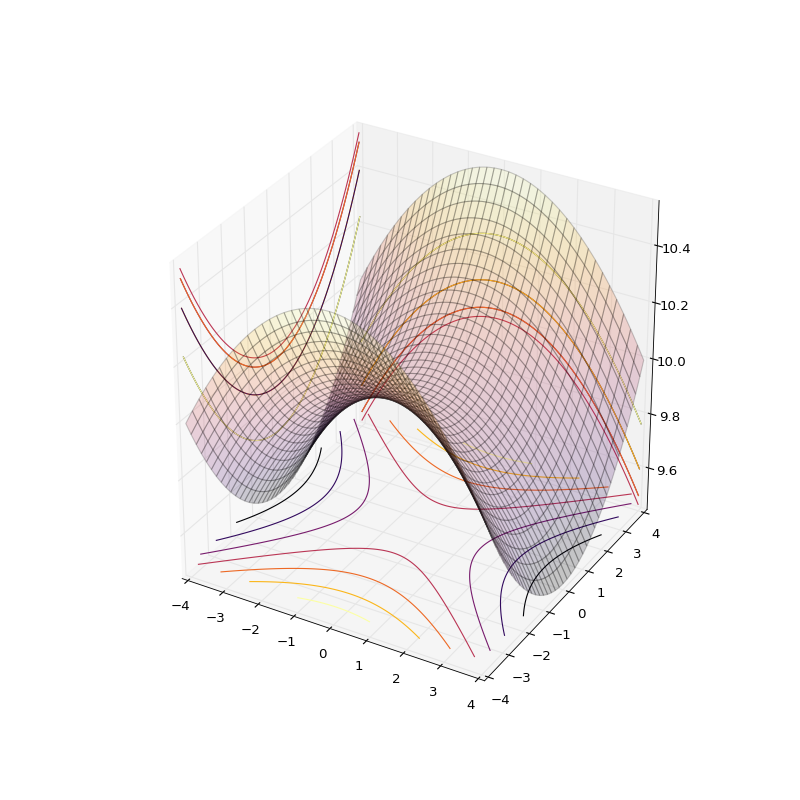

In [4]:
def f1(x, y):
    return (x**2 + y**2)/30 + 10
def f2(x, y):
    return -(x**2 + y**2)/30 + 10
def f3(x, y):
    return (-x**2 + y**2)/30 + 10
fig = plt.figure()
ax = plt.subplot(1, 1, 1, projection='3d')
X, Y = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))
choice = 2
funcs = [f1, f2, f3]
zoffs = [10., 8.9, 9.5]
Z = funcs[choice](X.ravel(), Y.ravel()).reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap=cm.inferno, alpha=0.2)

ax.contour(X, Y, Z, zdir='z', offset=zoffs[choice], cmap=cm.inferno)
ax.contour(X, Y, Z, zdir='x', offset=-4, cmap=cm.inferno)
ax.contour(X, Y, Z, zdir='y', offset=4, cmap=cm.inferno)
